In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Snehil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import os
import pandas as pd

def get_pdb_file_paths(pdb_folder):
    pdb_file_paths = []
    
    # Walk through all directories and subdirectories
    for dirpath, dirnames, filenames in os.walk(pdb_folder):
        for filename in filenames:
            if filename.endswith('.pdb'):
                # Construct the full file path and add it to the list
                pdb_file_paths.append(os.path.join(dirpath, filename))
    
    return pdb_file_paths


def read_CA_coordinates(file_path):
     CA_coords = []
     with open(file_path, 'r') as file:
         for line in file:
             if line.startswith("ATOM") and line[13:15].strip() == "CA":
                 x = float(line[30:38].strip())
                 y = float(line[38:46].strip())
                 z = float(line[46:54].strip())
                 CA_coords.append((x, y, z))
     return CA_coords


# def read_CA_coordinates(file_path):
#     bug_count = 0
#     CA_coords = []
    
#     with open(file_path, 'r') as file:
#         pdb_contents = file.read()
#         try:
#             for line in pdb_contents.split('\n'):
#                 if line.split()[0] == "ATOM":
#                     x,y,z = line.split()[6:9]
#                     CA_coords.append((float(x), float(y), float(z)))
#         except:
#             print(line.split())
#             print(file_path)

#     return CA_coords


def calculate_distances(coords):
    distances = []
    for i in range(1, len(coords)):
        x_diff = coords[i][0] - coords[i - 1][0]
        y_diff = coords[i][1] - coords[i - 1][1]
        z_diff = coords[i][2] - coords[i - 1][2]
        distance = (x_diff**2 + y_diff**2 + z_diff**2)**0.5
        distances.append(distance)
    return distances

def calculate_helical_rise(distances):
    return sum(distances) / len(distances) if distances else 0


In [4]:
# Put your path here

pdb_folder = r"C:\Users\Snehil\OneDrive\Desktop\ibab_internship\batch 2"
pdb_files = get_pdb_file_paths(pdb_folder)

# for pdb_file in pdb_files:
#     print(pdb_file)

In [5]:
coordinates = []
exceptions = []
for i in pdb_files:
    try:
        coordinates.append(read_CA_coordinates(i))
    except:
        print(i)
        exceptions.append(i)

In [6]:
distances = []
for i in coordinates:
    distances.append(calculate_distances(i))

In [7]:
helical_rises = []
for i in distances:
    helical_rises.append(round(calculate_helical_rise(i),2))

In [8]:
helix_names = []

for i in pdb_files:
        if i not in exceptions:
                helix_names.append(i.split('\\')[-1].split('.')[0])

In [9]:
print(f"{len(helix_names)} , {len(helical_rises)}")

1329 , 1329


In [10]:
output_df = pd.DataFrame({'Helix Name':helix_names,'Helical Rise' : helical_rises,'Index':[i+1 for i in range(len(helix_names))]})
output_df = output_df.set_index('Index')

In [11]:
file_name = 'shalini_hr_output.txt'

output_df.to_csv(file_name,sep ='\t',index=True)


In [12]:
output_df

,Helix Name,Helical Rise
Index,,
1,helix_1,3.81
2,helix_2,3.81
3,helix_3,3.81
4,helix_4,3.80
5,helix_5,3.81
...,...,...
1325,helix_5,3.81
1326,helix_6,3.82
1327,helix_7,3.81


In [13]:
print(output_df)

      Helix Name  Helical Rise
Index                         
1        helix_1          3.81
2        helix_2          3.81
3        helix_3          3.81
4        helix_4          3.80
5        helix_5          3.81
...          ...           ...
1325     helix_5          3.81
1326     helix_6          3.82
1327     helix_7          3.81
1328     helix_8          3.81
1329     helix_9          3.81

[1329 rows x 2 columns]


In [16]:
data = helical_rises

In [18]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Snehil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Snehil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
# from bokeh.plotting import figure, show, output_file
# from bokeh.io import push_notebook
# from bokeh.transform import jitter

# # Sample data
# data = helical_rises

# # Create histogram
# hist, edges = np.histogram(data, bins=5)

# p = figure(title="Histogram of Helical Rises", background_fill_color="#fafafa")
# p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], 
#        fill_color="skyblue", line_color="black", line_width=2)

# # Add titles and labels
# p.xaxis.axis_label = 'Helical Names'
# p.yaxis.axis_label = 'Helical Rises'

# # Output the plot
# output_file("histogram.html")
# show(p)


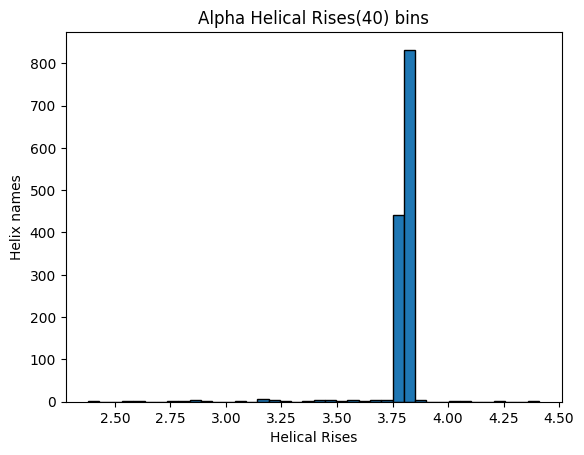

In [21]:
import matplotlib.pyplot as plt

# Sample data
data = helical_rises

# Create histogram
plt.hist(data, bins=40, edgecolor='black')

# Add title and labels
plt.title('Alpha Helical Rises(40) bins')
plt.xlabel('Helical Rises')
plt.ylabel('Helix names')

# Show plot
plt.show()
